<a href="https://colab.research.google.com/github/mokaddemhicham/Text-Mining-Classification-using-Artificial-Neural-Networks/blob/main/IMDB_Movie_Reviews_Classification_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Charger les données et Afficher les premières lignes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("IMDB Dataset.csv")
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


# Dictionnaire de données

In [ ]:
data_dict = {
    "review": "Texte de la critique du film",
    "sentiment": "Sentiment associé à la critique (positif ou négatif)"
}
print(data_dict)

{'review': 'Texte de la critique du film', 'sentiment': 'Sentiment associé à la critique (positif ou négatif)'}


# Statistiques descriptives

In [ ]:
print(data['sentiment'].value_counts() , "\n" )
print(data.describe() , "\n" )

sentiment
positive    25000
negative    25000
Name: count, dtype: int64 

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000 



# Visualisation des données

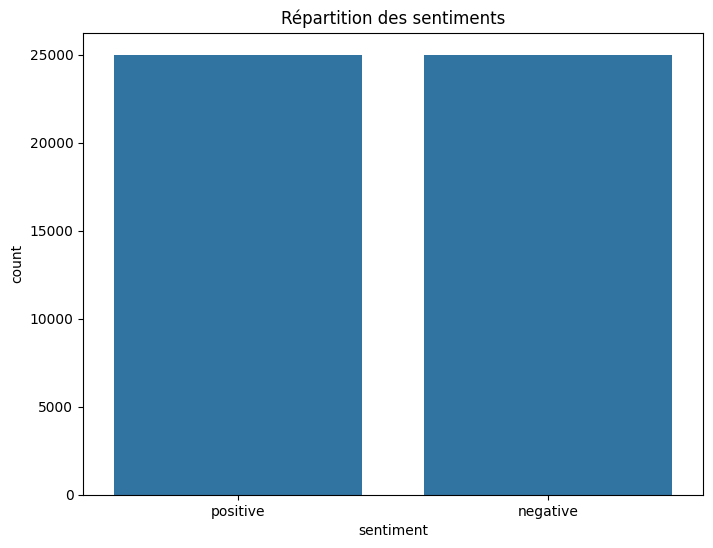

In [ ]:
# Répartition des sentiments
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=data)
plt.title("Répartition des sentiments")
plt.show()

# Prétraitement des données

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import tensorflow as tf

# Nettoyage des données
def clean_text(text):
    text = re.sub(r'<br />', ' ', text)
    text = re.sub('https://.*','', text)   #remove URLs
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()
    return text

data['review'] = data['review'].apply(clean_text)
print(data.head())

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production   the filming te...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  negative
4  petter matteis love in the time of money is a ...  positive


# Encoder les sentiments

In [ ]:
le = LabelEncoder()
data['sentiment'] = le.fit_transform(data['sentiment'])

# Séparer les données en ensembles d'entraînement et de test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

# Tokenizer et padding

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1  # +1 pour le token de padding
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Construire et compiler le modèle

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=100))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 64)           9161536   
                                                                 
 lstm_18 (LSTM)              (None, 100, 64)           33024     
                                                                 
 dropout_1 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_19 (LSTM)              (None, 64)                33024     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9227649 (35.20 MB)
Trainable params: 9227649 (35.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compiler et Entraîner le modèle

In [ ]:
# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# # Entraîner le modèle
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
625/625 [==============================] - 244s 385ms/step - loss: 0.3998 - accuracy: 0.8156 - val_loss: 0.3134 - val_accuracy: 0.8650
Epoch 2/5
625/625 [==============================] - 241s 386ms/step - loss: 0.1996 - accuracy: 0.9237 - val_loss: 0.3703 - val_accuracy: 0.8414
Epoch 3/5
625/625 [==============================] - 240s 384ms/step - loss: 0.1064 - accuracy: 0.9622 - val_loss: 0.4354 - val_accuracy: 0.8462
Epoch 4/5
625/625 [==============================] - 242s 388ms/step - loss: 0.0669 - accuracy: 0.9771 - val_loss: 0.5877 - val_accuracy: 0.8383
Epoch 5/5
625/625 [==============================] - 240s 384ms/step - loss: 0.0381 - accuracy: 0.9872 - val_loss: 0.6792 - val_accuracy: 0.8370


# Évaluer le modèle

In [ ]:
# Évaluer le modèle
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

313/313 [==============================] - 11s 36ms/step - loss: 0.6792 - accuracy: 0.8370
Accuracy: 83.70%


# Visualiser les résultats d'entraînement

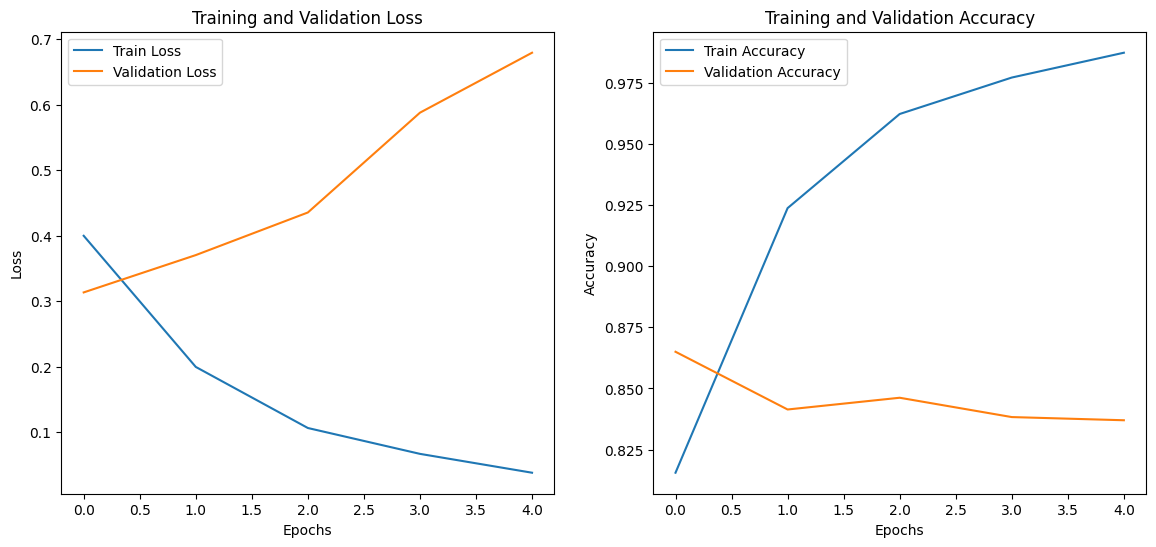

In [ ]:
import matplotlib.pyplot as plt

# Tracer la perte d'entraînement et de validation
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Tracer la précision d'entraînement et de validation
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

# Making predictions

In [ ]:
import numpy as np

sample_text = (
    '''The movie by ENSA Berrechid was so good and the animation are so dope.
    I would recommend my friends to watch it.'''
)

# Nettoyer le texte d'échantillon
sample_text_cleaned = clean_text(sample_text)

# Convertir le texte en séquence de nombres entiers
sample_text_seq = tokenizer.texts_to_sequences([sample_text_cleaned])

# Appliquer du padding à la séquence
sample_text_pad = pad_sequences(sample_text_seq, maxlen=100)

# Prédire la classe du texte
predictions = model.predict(sample_text_pad)

# Afficher la probabilité prédite
print(predictions[0][0])

# Afficher l'étiquette basée sur la prédiction
if predictions[0][0] > 0.5:
    print('The review is positive')
else:
    print('The review is negative')


1/1 [==============================] - 0s 35ms/step
0.92453945
The review is positive


In [ ]:
model.save('imdb.keras')